In [33]:
import datetime as dt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [17]:
import quandl

aapl = quandl.get("WIKI/AAPL", start_date="2006-10-01",
                  end_date="2012-01-01")

aapl.to_csv('data/aapl_ohlc.csv')

df = pd.read_csv('data/aapl_ohlc.csv', header=0, index_col='Date',
                 parse_dates=True)

df.describe()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
count,1323.000000,1323.000000,1323.000000,1323.000000,1.323000e+03,1323.0,1323.0,1323.000000,1323.000000,1323.000000,1323.000000,1.323000e+03
mean,202.303670,204.674047,199.552209,202.224393,2.689852e+07,0.0,1.0,26.104330,26.410193,25.749294,26.094101,1.882896e+08
std,98.862163,99.387200,98.208529,98.837774,1.467152e+07,0.0,0.0,12.756716,12.824465,12.672374,12.753569,1.027007e+08
min,73.420000,73.980000,72.600000,73.230000,5.624800e+06,0.0,1.0,9.473777,9.546037,9.367968,9.449261,3.937360e+07
25%,122.205000,124.270000,120.275000,122.020000,1.602910e+07,0.0,1.0,15.768768,16.035226,15.519730,15.744897,1.122037e+08
50%,176.260000,179.500000,173.080000,175.840000,2.328380e+07,0.0,1.0,22.743775,23.161850,22.333443,22.689581,1.629866e+08
75%,271.440000,273.927500,268.460000,270.900000,3.308900e+07,0.0,1.0,35.025363,35.346338,34.640837,34.955683,2.316230e+08
max,421.760000,426.700000,415.990000,422.240000,1.204632e+08,0.0,1.0,54.421960,55.059395,53.677426,54.483897,8.432424e+08


In [ ]:
# Return last rows of `appl`

In [ ]:
# Return last rows of `appl`

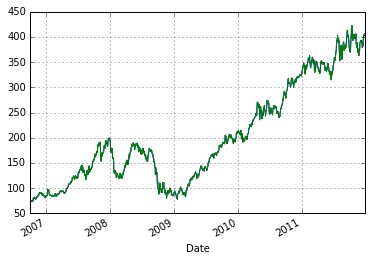

In [18]:
df['Close'].plot(grid=True)
plt.show()

In [24]:
# Assign `Adj Close` to `daily_close`
daily_close = df[['Adj. Close']]

# Daily returns
daily_pct_change = daily_close.pct_change()

# Replace NA values with 0
daily_pct_change.fillna(0, inplace=True)

# Inspect daily returns
print(daily_pct_change)

# Daily log returns
daily_log_returns = np.log(daily_close.pct_change()+1)

# Print daily log returns
print(daily_log_returns)

            Adj. Close
Date                  
2006-10-02    0.000000
2006-10-03   -0.010553
2006-10-04    0.017686
2006-10-05   -0.007296
2006-10-06   -0.008152
2006-10-09    0.005524
2006-10-10   -0.010988
2006-10-11   -0.007858
2006-10-12    0.027721
2006-10-13   -0.003189
2006-10-16    0.005065
2006-10-17   -0.014721
2006-10-18    0.003231
2006-10-19    0.059842
2006-10-20    0.012153
2006-10-23    0.018887
2006-10-24   -0.005033
2006-10-25    0.007773
2006-10-26    0.006244
2006-10-27   -0.021657
2006-10-30    0.000124
2006-10-31    0.008207
2006-11-01   -0.023680
2006-11-02   -0.002274
2006-11-03   -0.008736
2006-11-06    0.018138
2006-11-07    0.010036
2006-11-08    0.024096
2006-11-09    0.010794
2006-11-10   -0.002640
...                ...
2011-11-17   -0.019128
2011-11-18   -0.006545
2011-11-21   -0.015816
2011-11-22    0.020325
2011-11-23   -0.025285
2011-11-25   -0.009319
2011-11-28    0.034519
2011-11-29   -0.007763
2011-11-30    0.024116
2011-12-01    0.014992
2011-12-02 

In [25]:
# Resample `aapl` to business months, take last observation as value 
monthly = df.resample('BM').apply(lambda x: x[-1])

# Calculate the monthly percentage change
monthly.pct_change()

# Resample `aapl` to quarters, take the mean as value per quarter
quarter = df.resample("4M").mean()

# Calculate the quarterly percentage change
quarter.pct_change()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2006-10-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-02-28,0.125782,0.124336,0.121461,0.122890,0.369611,NaN,0.0,0.125782,0.124336,0.121461,0.122890,0.369611
2007-06-30,0.196028,0.195413,0.198331,0.197710,-0.080296,NaN,0.0,0.196028,0.195413,0.198331,0.197710,-0.080296
2007-10-31,0.400986,0.404614,0.392010,0.400796,0.306882,NaN,0.0,0.400986,0.404614,0.392010,0.400796,0.306882
2008-02-29,0.127085,0.131274,0.117746,0.120394,0.172293,NaN,0.0,0.127085,0.131274,0.117746,0.120394,0.172293
2008-06-30,-0.003844,-0.004781,0.005927,0.003673,-0.209762,NaN,0.0,-0.003844,-0.004781,0.005927,0.003673,-0.209762
2008-10-31,-0.114295,-0.108566,-0.124619,-0.118803,0.133219,NaN,0.0,-0.114295,-0.108566,-0.124619,-0.118803,0.133219
2009-02-28,-0.363319,-0.363614,-0.359304,-0.360865,-0.161601,NaN,0.0,-0.363319,-0.363614,-0.359304,-0.360865,-0.161601
2009-06-30,0.311992,0.304360,0.324701,0.316630,-0.386935,NaN,0.0,0.311992,0.304360,0.324701,0.316630,-0.386935


In [26]:
# Daily returns
daily_pct_change = daily_close / daily_close.shift(1) - 1

# Print `daily_pct_change`
print(daily_pct_change)

            Adj. Close
Date                  
2006-10-02         NaN
2006-10-03   -0.010553
2006-10-04    0.017686
2006-10-05   -0.007296
2006-10-06   -0.008152
2006-10-09    0.005524
2006-10-10   -0.010988
2006-10-11   -0.007858
2006-10-12    0.027721
2006-10-13   -0.003189
2006-10-16    0.005065
2006-10-17   -0.014721
2006-10-18    0.003231
2006-10-19    0.059842
2006-10-20    0.012153
2006-10-23    0.018887
2006-10-24   -0.005033
2006-10-25    0.007773
2006-10-26    0.006244
2006-10-27   -0.021657
2006-10-30    0.000124
2006-10-31    0.008207
2006-11-01   -0.023680
2006-11-02   -0.002274
2006-11-03   -0.008736
2006-11-06    0.018138
2006-11-07    0.010036
2006-11-08    0.024096
2006-11-09    0.010794
2006-11-10   -0.002640
...                ...
2011-11-17   -0.019128
2011-11-18   -0.006545
2011-11-21   -0.015816
2011-11-22    0.020325
2011-11-23   -0.025285
2011-11-25   -0.009319
2011-11-28    0.034519
2011-11-29   -0.007763
2011-11-30    0.024116
2011-12-01    0.014992
2011-12-02 

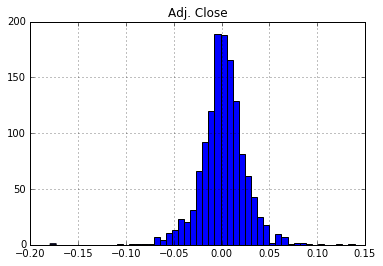

        Adj. Close
count  1322.000000
mean      0.001567
std       0.023994
min      -0.179195
25%      -0.010630
50%       0.001680
75%       0.014306
max       0.139050


In [27]:
# Import matplotlib
import matplotlib.pyplot as plt

# Plot the distribution of `daily_pct_c`
daily_pct_change.hist(bins=50)

# Show the plot
plt.show()

# Pull up summary statistics
print(daily_pct_change.describe())

In [28]:
# Calculate the cumulative daily returns
cum_daily_return = (1 + daily_pct_change).cumprod()

# Print `cum_daily_return`
print(cum_daily_return)

            Adj. Close
Date                  
2006-10-02         NaN
2006-10-03    0.989447
2006-10-04    1.006946
2006-10-05    0.999599
2006-10-06    0.991451
2006-10-09    0.996928
2006-10-10    0.985974
2006-10-11    0.978226
2006-10-12    1.005343
2006-10-13    1.002137
2006-10-16    1.007213
2006-10-17    0.992386
2006-10-18    0.995592
2006-10-19    1.055170
2006-10-20    1.067994
2006-10-23    1.088165
2006-10-24    1.082688
2006-10-25    1.091103
2006-10-26    1.097916
2006-10-27    1.074138
2006-10-30    1.074272
2006-10-31    1.083088
2006-11-01    1.057441
2006-11-02    1.055036
2006-11-03    1.045819
2006-11-06    1.064788
2006-11-07    1.075474
2006-11-08    1.101389
2006-11-09    1.113278
2006-11-10    1.110339
...                ...
2011-11-17    5.041544
2011-11-18    5.008549
2011-11-21    4.929335
2011-11-22    5.029522
2011-11-23    4.902351
2011-11-25    4.856666
2011-11-28    5.024312
2011-11-29    4.985306
2011-11-30    5.105530
2011-12-01    5.182073
2011-12-02 

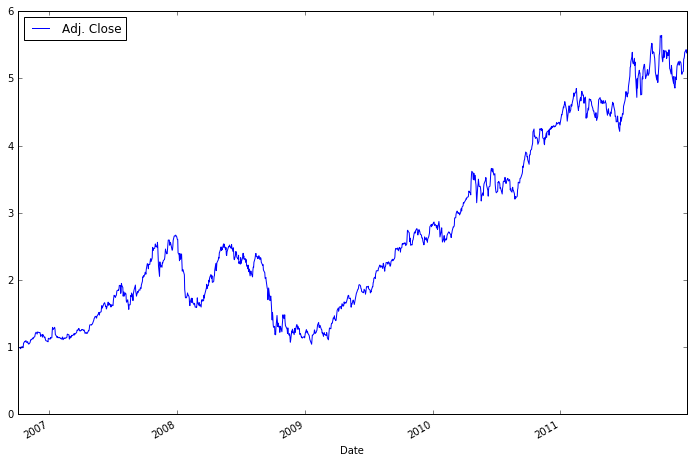

In [29]:
# Import matplotlib
import matplotlib.pyplot as plt 

# Plot the cumulative daily returns
cum_daily_return.plot(figsize=(12,8))

# Show the plot
plt.show()

In [30]:
# Resample the cumulative daily return to cumulative monthly return 
cum_monthly_return = cum_daily_return.resample("M").mean()

# Print the `cum_monthly_return`
print(cum_monthly_return)

            Adj. Close
Date                  
2006-10-31    1.031704
2006-11-30    1.140058
2006-12-31    1.155110
2007-01-31    1.187303
2007-02-28    1.145275
2007-03-31    1.210302
2007-04-30    1.251735
2007-05-31    1.453453
2007-06-30    1.625637
2007-07-31    1.818073
2007-08-31    1.734484
2007-09-30    1.897943
2007-10-31    2.295092
2007-11-30    2.333129
2007-12-31    2.544819
2008-01-31    2.142375
2008-02-29    1.671827
2008-03-31    1.747569
2008-04-30    2.113108
2008-05-31    2.468067
2008-06-30    2.384260
2008-07-31    2.240831
2008-08-31    2.285193
2008-09-30    1.886766
2008-10-31    1.322521
2008-11-30    1.254883
2008-12-31    1.222864
2009-01-31    1.185880
2009-02-28    1.256669
2009-03-31    1.302697
...                ...
2009-07-31    1.994629
2009-08-31    2.221219
2009-09-30    2.374922
2009-10-31    2.575896
2009-11-30    2.675928
2009-12-31    2.657690
2010-01-31    2.774723
2010-02-28    2.655557
2010-03-31    2.984379
2010-04-30    3.354910
2010-05-31 

In [37]:
def get(tickers, startdate, enddate):
    def data(ticker):
        return (quandl.get('WIKI/{}'.format(ticker),
                           start_date=startdate.isoformat(),
                           end_date=enddate.isoformat()))
    
    datas = map (data, tickers)
    
    return(pd.concat(datas, keys=tickers, names=['Ticker', 'Date']))

tickers = ['AAPL', 'MSFT', 'IBM', 'GOOG']
all_data = get(tickers, dt.date(2006, 10, 1),
               dt.date(2012, 1, 1))

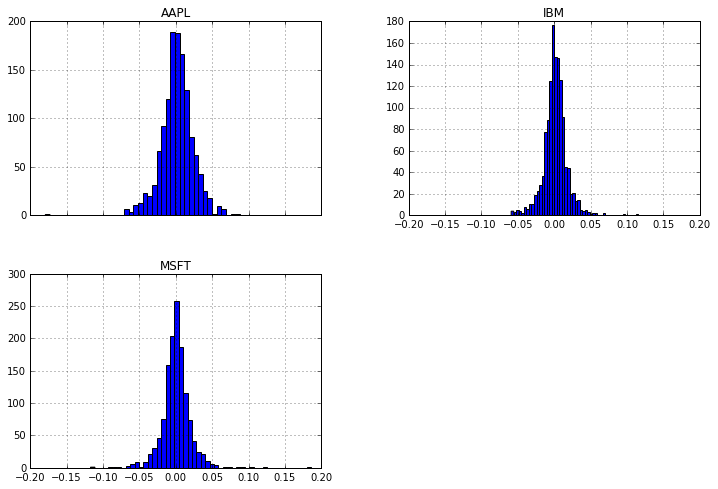

In [41]:
# Import matplotlib
import matplotlib.pyplot as plt 

# Isolate the `Adj Close` values and transform the DataFrame
daily_close_px = all_data[['Adj. Close']].reset_index().pivot('Date',
                                                              'Ticker',
                                                              'Adj. Close')

# Calculate the daily percentage change for `daily_close_px`
daily_pct_change = daily_close_px.pct_change()

# Plot the distributions
daily_pct_change.hist(bins=50, sharex=True, figsize=(12,8))

# Show the resulting plot
plt.show()

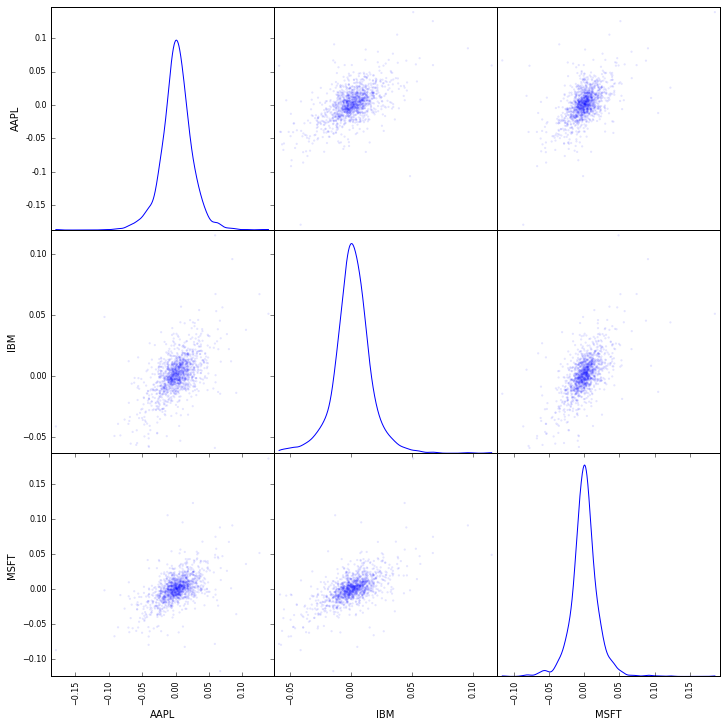

In [46]:
# Plot a scatter matrix with the `daily_pct_change` data 
pd.plotting.scatter_matrix(daily_pct_change, diagonal='kde', alpha=0.1,figsize=(12,12))

# Show the plot
plt.show()

In [48]:
# Isolate the adjusted closing prices 
adj_close_px = df['Adj. Close']

# Calculate the moving average
moving_avg = adj_close_px.rolling(window=40).mean()

# Inspect the result
print(moving_avg[-10:])

Date
2011-12-16    50.157051
2011-12-19    50.122663
2011-12-20    50.090985
2011-12-21    50.086710
2011-12-22    50.080097
2011-12-23    50.075710
2011-12-27    50.080807
2011-12-28    50.073904
2011-12-29    50.101678
2011-12-30    50.126163
Name: Adj. Close, dtype: float64


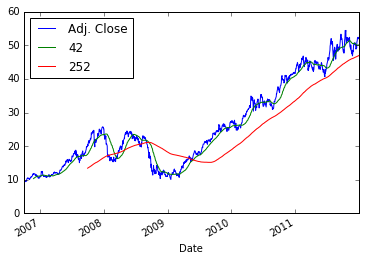

In [50]:
# Short moving window rolling mean
df['42'] = adj_close_px.rolling(window=40).mean()

# Long moving window rolling mean
df['252'] = adj_close_px.rolling(window=252).mean()

# Plot the adjusted closing price, the short and long windows of rolling means
df[['Adj. Close', '42', '252']].plot()

# Show plot
plt.show()

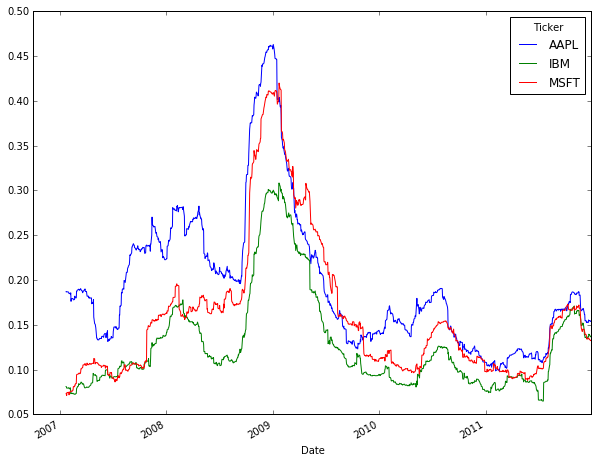

In [51]:
# Define the minumum of periods to consider 
min_periods = 75 

# Calculate the volatility
vol = daily_pct_change.rolling(min_periods).std() * np.sqrt(min_periods) 

# Plot the volatility
vol.plot(figsize=(10, 8))

# Show the plot
plt.show()

In [54]:
# Import the `api` model of `statsmodels` under alias `sm`
import statsmodels.api as sm

# Import the `datetools` module from `pandas`
from pandas.core import datetools

# Isolate the adjusted closing price
all_adj_close = all_data[['Adj. Close']]

# Calculate the returns 
all_returns = np.log(all_adj_close / all_adj_close.shift(1))

# Isolate the AAPL returns 
aapl_returns = all_returns.iloc[all_returns.index.get_level_values('Ticker') == 'AAPL']
aapl_returns.index = aapl_returns.index.droplevel('Ticker')

# Isolate the MSFT returns
msft_returns = all_returns.iloc[all_returns.index.get_level_values('Ticker') == 'MSFT']
msft_returns.index = msft_returns.index.droplevel('Ticker')

# Build up a new DataFrame with AAPL and MSFT returns
return_data = pd.concat([aapl_returns, msft_returns], axis=1)[1:]
return_data.columns = ['AAPL', 'MSFT']

# Add a constant 
X = sm.add_constant(return_data['AAPL'])

# Construct the model
model = sm.OLS(return_data['MSFT'],X).fit()

# Print the summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   MSFT   R-squared:                       0.281
Model:                            OLS   Adj. R-squared:                  0.281
Method:                 Least Squares   F-statistic:                     516.0
Date:                Fri, 09 Jun 2017   Prob (F-statistic):           1.09e-96
Time:                        11:09:32   Log-Likelihood:                 3514.1
No. Observations:                1322   AIC:                            -7024.
Df Residuals:                    1320   BIC:                            -7014.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0005      0.000     -1.119      0.2

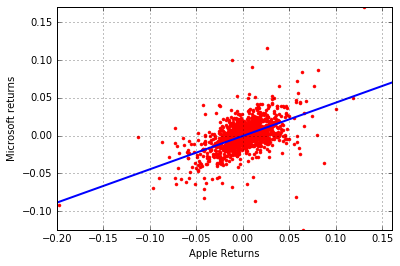

In [55]:
# Plot returns of AAPL and MSFT
plt.plot(return_data['AAPL'], return_data['MSFT'], 'r.')

# Add an axis to the plot
ax = plt.axis()

# Initialize `x`
x = np.linspace(ax[0], ax[1] + 0.01)

# Plot the regression line
plt.plot(x, model.params[0] + model.params[1] * x, 'b', lw=2)

# Customize the plot
plt.grid(True)
plt.axis('tight')
plt.xlabel('Apple Returns')
plt.ylabel('Microsoft returns')

# Show the plot
plt.show()

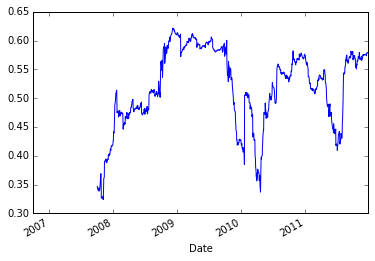

In [56]:
# Plot the rolling correlation
return_data['MSFT'].rolling(window=252).corr(return_data['AAPL']).plot()

# Show the plot
plt.show()

In [57]:
# Initialize the short and long windows
short_window = 40
long_window = 100

# Initialize the `signals` DataFrame with the `signal` column
signals = pd.DataFrame(index=aapl.index)
signals['signal'] = 0.0

# Create short simple moving average over the short window
signals['short_mavg'] = aapl['Close'].rolling(window=short_window, min_periods=1, center=False).mean()

# Create long simple moving average over the long window
signals['long_mavg'] = aapl['Close'].rolling(window=long_window, min_periods=1, center=False).mean()

# Create signals
signals['signal'][short_window:] = np.where(signals['short_mavg'][short_window:] 
                                            > signals['long_mavg'][short_window:], 1.0, 0.0)   

# Generate trading orders
signals['positions'] = signals['signal'].diff()

# Print `signals`
print(signals)

            signal  short_mavg   long_mavg  positions
Date                                                 
2006-10-02     0.0   74.860000   74.860000        NaN
2006-10-03     0.0   74.465000   74.465000        0.0
2006-10-04     0.0   74.770000   74.770000        0.0
2006-10-05     0.0   74.785000   74.785000        0.0
2006-10-06     0.0   74.672000   74.672000        0.0
2006-10-09     0.0   74.665000   74.665000        0.0
2006-10-10     0.0   74.542857   74.542857        0.0
2006-10-11     0.0   74.378750   74.378750        0.0
2006-10-12     0.0   74.476667   74.476667        0.0
2006-10-13     0.0   74.531000   74.531000        0.0
2006-10-16     0.0   74.610000   74.610000        0.0
2006-10-17     0.0   74.583333   74.583333        0.0
2006-10-18     0.0   74.579231   74.579231        0.0
2006-10-19     0.0   74.894286   74.894286        0.0
2006-10-20     0.0   75.231333   75.231333        0.0
2006-10-23     0.0   75.620625   75.620625        0.0
2006-10-24     0.0   75.9400

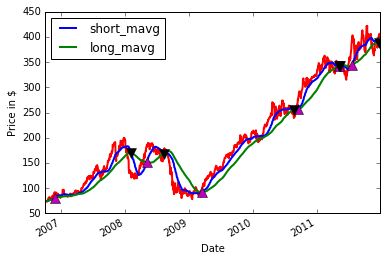

In [58]:
# Initialize the plot figure
fig = plt.figure()

# Add a subplot and label for y-axis
ax1 = fig.add_subplot(111,  ylabel='Price in $')

# Plot the closing price
aapl['Close'].plot(ax=ax1, color='r', lw=2.)

# Plot the short and long moving averages
signals[['short_mavg', 'long_mavg']].plot(ax=ax1, lw=2.)

# Plot the buy signals
ax1.plot(signals.loc[signals.positions == 1.0].index, 
         signals.short_mavg[signals.positions == 1.0],
         '^', markersize=10, color='m')
         
# Plot the sell signals
ax1.plot(signals.loc[signals.positions == -1.0].index, 
         signals.short_mavg[signals.positions == -1.0],
         'v', markersize=10, color='k')
         
# Show the plot
plt.show()

In [62]:
# Set the initial capital
initial_capital= float(100000.0)

# Create a DataFrame `positions`
positions = pd.DataFrame(index=signals.index).fillna(0.0)

# Buy a 100 shares
positions['AAPL'] = 100*signals['signal']   
  
# Initialize the portfolio with value owned   
portfolio = positions.multiply(aapl['Adj. Close'], axis=0)

# Store the difference in shares owned 
pos_diff = positions.diff()

# Add `holdings` to portfolio
portfolio['holdings'] = (positions.multiply(aapl['Adj. Close'], axis=0)).sum(axis=1)

# Add `cash` to portfolio
portfolio['cash'] = initial_capital - (pos_diff.multiply(aapl['Adj. Close'], axis=0)).sum(axis=1).cumsum()   

# Add `total` to portfolio
portfolio['total'] = portfolio['cash'] + portfolio['holdings']

# Add `returns` to portfolio
portfolio['returns'] = portfolio['total'].pct_change()

# Print the first lines of `portfolio`
print(portfolio.head())

            AAPL  holdings      cash     total  returns
Date                                                   
2006-10-02   0.0       0.0       NaN       NaN      NaN
2006-10-03   0.0       0.0  100000.0  100000.0      NaN
2006-10-04   0.0       0.0  100000.0  100000.0      0.0
2006-10-05   0.0       0.0  100000.0  100000.0      0.0
2006-10-06   0.0       0.0  100000.0  100000.0      0.0


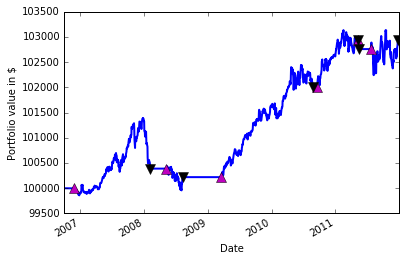

In [63]:
# Create a figure
fig = plt.figure()

ax1 = fig.add_subplot(111, ylabel='Portfolio value in $')

# Plot the equity curve in dollars
portfolio['total'].plot(ax=ax1, lw=2.)

ax1.plot(portfolio.loc[signals.positions == 1.0].index, 
         portfolio.total[signals.positions == 1.0],
         '^', markersize=10, color='m')
ax1.plot(portfolio.loc[signals.positions == -1.0].index, 
         portfolio.total[signals.positions == -1.0],
         'v', markersize=10, color='k')

# Show the plot
plt.show()

In [64]:
def initialize(context):
    context.sym = symbol('AAPL')
    context.i = 0


def handle_data(context, data):
    # Skip first 300 days to get full windows
    context.i += 1
    if context.i < 300:
        return

    # Compute averages
    # history() has to be called with the same params
    # from above and returns a pandas dataframe.
    short_mavg = data.history(context.sym, 'price', 100, '1d').mean()
    long_mavg = data.history(context.sym, 'price', 300, '1d').mean()

    # Trading logic
    if short_mavg > long_mavg:
        # order_target orders as many shares as needed to
        # achieve the desired number of shares.
        order_target(context.sym, 100)
    elif short_mavg < long_mavg:
        order_target(context.sym, 0)

    # Save values for later inspection
    record(AAPL=data.current(context.sym, "price"),
           short_mavg=short_mavg,
           long_mavg=long_mavg)


In [65]:
# Isolate the returns of your strategy
returns = portfolio['returns']

# annualized Sharpe ratio
sharpe_ratio = np.sqrt(252) * (returns.mean() / returns.std())

# Print the Sharpe ratio
print(sharpe_ratio)

0.726426104796


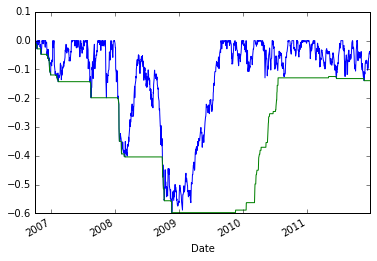

In [67]:
# Define a trailing 252 trading day window
window = 252

# Calculate the max drawdown in the past window days for each day 
rolling_max = aapl['Adj. Close'].rolling(window, min_periods=1).max()
daily_drawdown = aapl['Adj. Close']/rolling_max - 1.0

# Calculate the minimum (negative) daily drawdown
max_daily_drawdown = daily_drawdown.rolling(window, min_periods=1).min()

# Plot the results
daily_drawdown.plot()
max_daily_drawdown.plot()

# Show the plot
plt.show()

In [69]:
# Get the number of days in `aapl`
days = (aapl.index[-1] - aapl.index[0]).days

# Calculate the CAGR 
cagr = ((((aapl['Adj. Close'][-1]) / aapl['Adj. Close'][1])) ** (365.0/days)) - 1

# Print the CAGR
print(cagr)

0.382380127071
